In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [3]:
df = pd.read_csv('../clean-datasets/primary.csv')
df.drop(df[df['last_funding_type'].str.contains('bankrupt', case=False, na=False)].index, inplace=True)
df.columns

Index(['name', 'tagline', 'summary', 'description', 'year_founded', 'website',
       'city', 'region', 'country', 'postal_code', 'concepts', 'keywords',
       'investor_count', 'mosaic_change', 'funding_total_millions',
       'last_funding_millions', 'funding_count', 'last_funding_type',
       'last_funding_date', 'sentiment', 'articles'],
      dtype='object')

In [65]:
df_country_unique = df['country'].unique()
#df_country_unique

In [66]:
max_funding = []
for country in df_country_unique:
    max_funding_country = df[df['country'] == country]['funding_total_millions'].max()
    max_funding.append(max_funding_country)

max_funding_array = np.array(max_funding)
#max_funding_array

sorted_indices = np.argsort(max_funding_array)
sorted_countries = df_country_unique[sorted_indices]
sorted_funding = max_funding_array[sorted_indices]

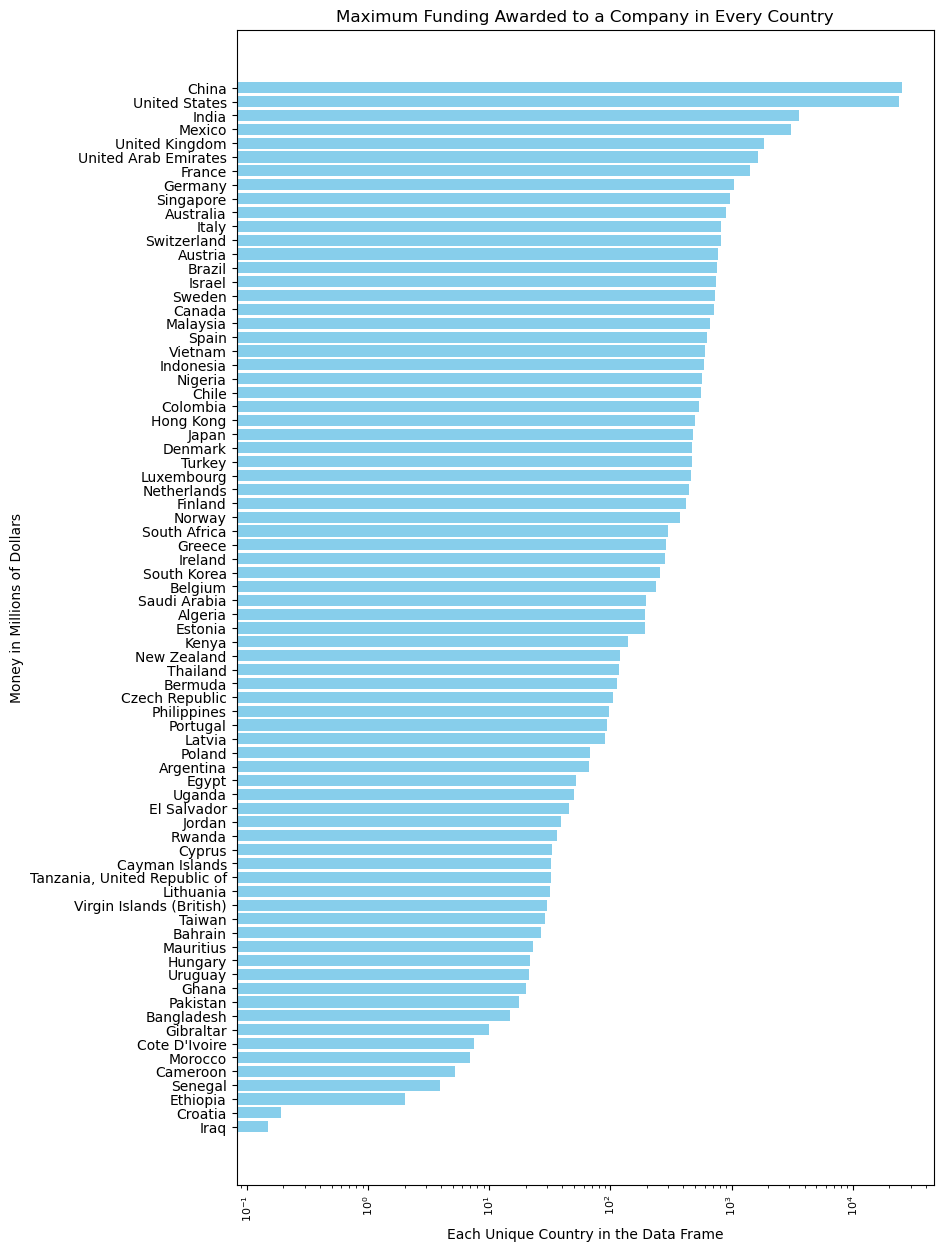

In [70]:
plt.figure(figsize=(9, 15))
plt.xticks(rotation=90)
plt.barh(sorted_countries, sorted_funding, color='skyblue')
plt.xscale('log')
plt.xticks(fontsize=8)
plt.title('Maximum Funding Awarded to a Company in Every Country')
plt.ylabel('Money in Millions of Dollars')
plt.xlabel('Each Unique Country in the Data Frame')
plt.show()

This graph illustrates the maximum amount of funding an individual company recieved in each country.\n This will be vital to our analysis because we can predict if a company will recieve more funding based on the country they founded their company in.

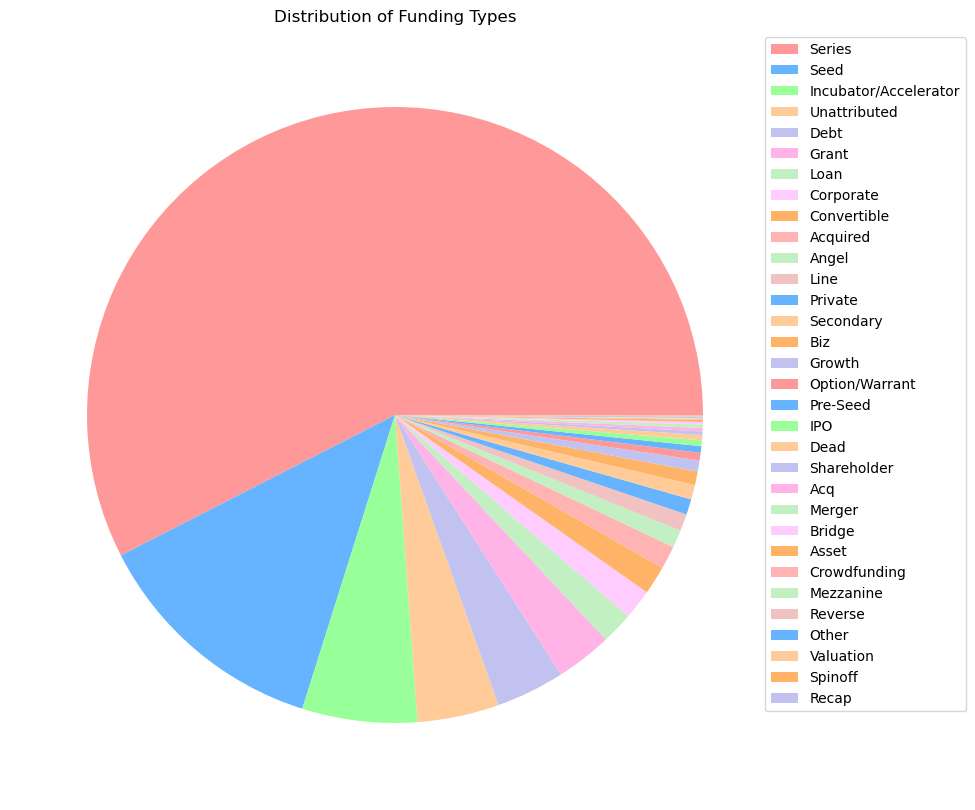

In [72]:
first_word_counts = df['last_funding_type'].str.split().str[0].value_counts()
len(first_word_counts)

custom_colors = [
    '#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0',
    '#ffb3e6', '#c2f0c2', '#ffccff', '#ffb366', '#ffb3b3',
    '#c2f0c2', '#f0c2c2', '#66b3ff', '#ffcc99', '#ffb366',
    '#c2c2f0', '#ff9999', '#66b3ff', '#99ff99', '#ffcc99',
    '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffccff', '#ffb366',
    '#ffb3b3', '#c2f0c2', '#f0c2c2', '#66b3ff', '#ffcc99',
    '#ffb366', '#c2c2f0', '#ff9999', '#ffcc00', '#33cc33' 
]
plt.figure(figsize=(15, 10))
plt.pie(first_word_counts, colors=custom_colors)
plt.legend(first_word_counts.index, bbox_to_anchor=(1.25, 1), loc='upper right')
plt.title('Distribution of Funding Types')
plt.show()

This pie chart illustrates the last funding type an individual company recieved.\n This information will be important to our analysis because we can predict the success of a company based on the type of funding they recieved.